Filtering of the images with sharpening and visualization of the Sharpened image with the original image using heat maps.

In [ ]:
import os
import cv2
import random
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, color
from skimage.io import imshow, imread
from skimage.color import rgb2yuv, rgb2hsv, rgb2gray, yuv2rgb, hsv2rgb
from scipy.signal import convolve2d

In [ ]:
# mounting your google drive from which we are going to collect the tea leaves 

from google.colab import drive  
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


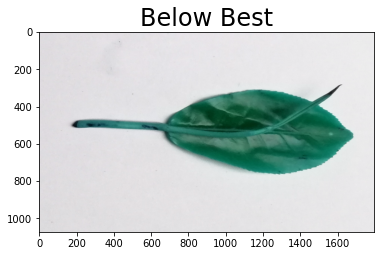

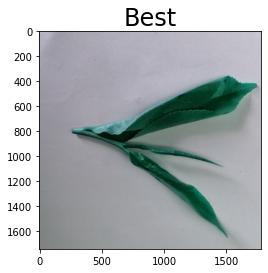

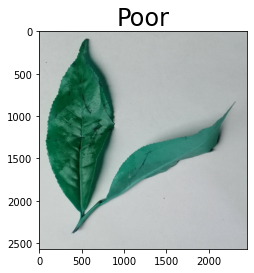

In [ ]:
# Fetching the data from the directory and also taking random images from our directory

Directory = "/content/drive/MyDrive/Low/Fresh"
 
CATEGORIES = ["Below Best", "Best", "Poor"]     # In our directory location of the images we have further categories of Below best, best and poor
 
images = []   # create this array to place in our after obtained images
 
for category in CATEGORIES:  
    path = os.path.join(Directory,category)  
    imag = random.choice([                                                # taking the random item but this doesn't print out the item but rather the item name
                           img for img in os.listdir(path)
                           if os.path.isfile(os.path.join(path, img))
    ])
    image = cv2.imread(os.path.join(path, imag))                      # then collect the image from its item name 
    images.append(image)
    plt.imshow(image) 
    plt.title(category, fontsize = 24)
    plt.show()

Sharpening of one single random image

Text(0.5, 1.0, 'Sharpen')

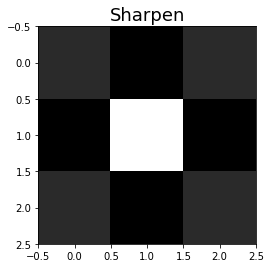

In [ ]:
#Sharpen array
sharpen = np.array([[0, -1, 0],
                    [-1, 5, -1],
                    [0, -1, 0]])
 
plt.imshow(sharpen, cmap='gray')
plt.title(f'Sharpen', fontsize = 18)

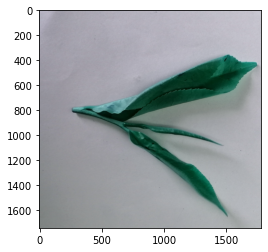

In [ ]:
plt.imshow(images[1])
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


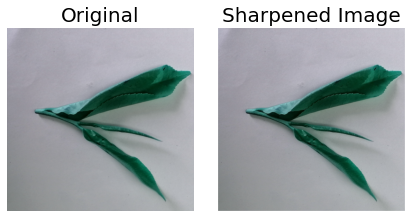

In [ ]:
# Using the sharpening kernel above, the iterations of applying the kernel the image shows the stability of the sharpened image

def multi_convolver(image, kernel, iterations):
    for i in range(iterations):
        image = convolve2d(image, kernel, 'same', boundary = 'fill',      # with the help of the convolved2d library, we are able to sharpen our image 
                           fillvalue = 0)
    return image
    
def convolver_rgb(image, kernel, iterations = 1):
    img_yuv = rgb2yuv(image)                                      # the image is made to a yuv image instead of using the primary image. 
    img_yuv[:,:,0] = multi_convolver(img_yuv[:,:,0], kernel, 
                                     iterations)
    final_image = yuv2rgb(img_yuv)
                               
    fig, ax = plt.subplots(1,2)
    
    ax[0].imshow(image)
    ax[0].set_title(f'Original', fontsize = 20)
    
    ax[1].imshow(final_image);
    ax[1].set_title(f'Sharpened Image', fontsize = 20)
    
    [axi.set_axis_off() for axi in ax.ravel()]
    
    fig.tight_layout()
    
    return final_image
final_image = convolver_rgb(images[1], sharpen, iterations = 1)

**Visualization using heatmaps**
Comparision of the the Sharpened image and the original

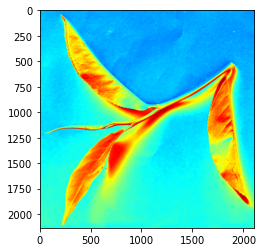

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


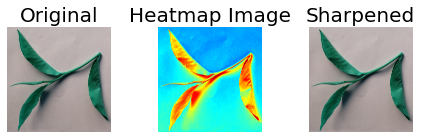

In [ ]:
 #get color map
heatmap_img = cv2.applyColorMap(images[1], cv2.COLORMAP_JET)
 
#heatmap_img_sharp = cv2.applyColorMap(final_image, cv2.COLORMAP_JET)
#merge map and image
#fin = cv2.addWeighted(heatmap_img, 0.5, images[1], 0.5, 0)
 
#show result
#cv2.imshow('images[1]', fin)
plt.imshow(heatmap_img)
plt.show()
 
fig, ax = plt.subplots(1,3)
    
ax[0].imshow(images[1])
ax[0].set_title(f'Original', fontsize = 20)
    
ax[1].imshow(heatmap_img);
ax[1].set_title(f'Heatmap Image', fontsize = 20)
 
ax[2].imshow(final_image)
ax[2].set_title(f'Sharpened', fontsize = 20)
    
#ax[3].imshow(heatmap_img_sharp);
#ax[3].set_title(f'Heatmap Image', fontsize = 20)
 
[axi.set_axis_off() for axi in ax.ravel()]
    
fig.tight_layout()